# <center><strong><font color='grey'>Predicting Survival in Titanic</font></strong></center>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/450px-RMS_Titanic_3.jpg" height=400></center>

----



Problem statement:

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered "unsinkable" RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren't enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. The task is to build a predictive model to understand who is more likely to survive.

This dataset was scraped from [kaggle.com](https://www.kaggle.com/c/titanic/data?select=train.csv) and includes all information 
of passengers on board (891 to be exact) and importantly, will reveal whether they survived or not.

## Importing Libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
df = pd.read_csv('titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
print("No. of passengers in original data : "+str(len(df.index)))

No. of passengers in original data : 891


In [4]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

549 --> Not Survived 

342 -->  Survived 

## Data visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

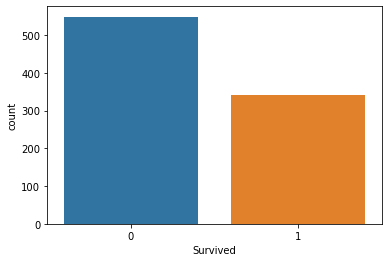

In [5]:
# to see survived peoples

sns.countplot(x = "Survived", data = df,)

# 0 ---> Not Survived
# 1 ---> Survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

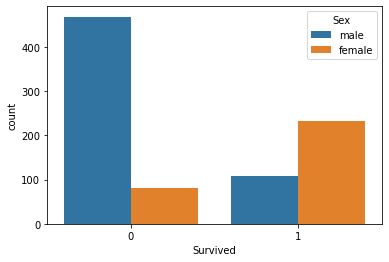

In [6]:
#To see how many males and how many females survived

sns.countplot(x="Survived",hue="Sex",data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

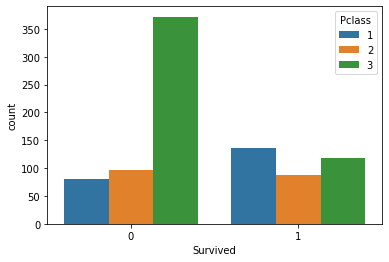

In [7]:
# To check survived people are from which class like 1-2-3

sns.countplot(x="Survived",hue="Pclass",data = df)

# 1 ---> First Class Passengers
# 2 ---> Second Class Passengers
# 3 ---> Third Class Passengers

<AxesSubplot:ylabel='Frequency'>

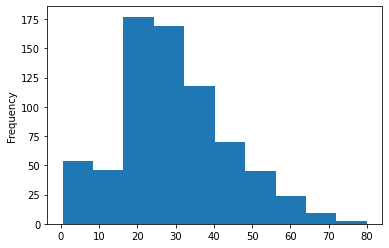

In [8]:
# To check age of Passengers

df["Age"].plot.hist()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

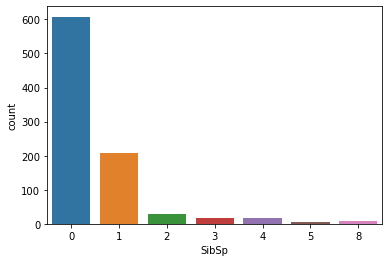

In [10]:
sns.countplot(x="SibSp",data=df)

# SibSp: Shows number of siblings or spouse with passenger

## Data Wrangling (Data Cleaning)

In [11]:
# To check data has null data or not

df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
# To check data has total null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

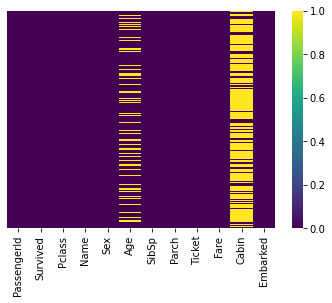

In [14]:
# Here yellow means True(Null/NaN Values)

sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

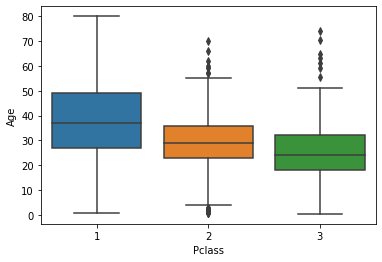

In [15]:

sns.boxplot(x="Pclass", y="Age", data= df)

<AxesSubplot:xlabel='Age'>

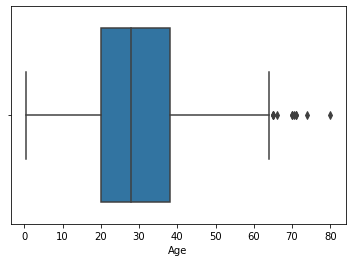

In [16]:
sns.boxplot(x="Age", data= df)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.drop("Cabin", axis = 1,inplace=True)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
len(df)

891

In [21]:
df.dropna(inplace=True)

In [22]:
len(df)

712

<AxesSubplot:>

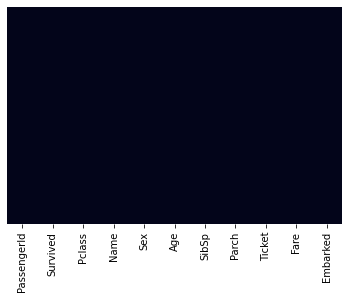

In [23]:
# to check is there is null value or not
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
df.Sex = df.Sex.map({'male': 1, 'female': 0})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [26]:
# df = pd.concat([df,embark], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [27]:
df.drop(['PassengerId','Name','Embarked','Ticket','SibSp','Parch'], axis=1, inplace=True)

In [28]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


## Train and Test Data

In [100]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [101]:
from sklearn.model_selection import train_test_split


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Standardization of Data

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaled = StandardScaler()

In [113]:
scaled.fit(X_train)
scaled_X_train = scaled.transform(X_train)
scaled_X_test = scaled.transform(X_test)

---

**Creating a function that will give model score(Accuracy) for different Machine Learning Algorithms***


In [114]:
def get_score(model,X_train, X_test, y_train, y_test):
    model.fit(scaled_X_train,y_train)
    return model.score(scaled_X_test,y_test)

In [115]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

## Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression()

In [117]:
get_score(Logistic,X_train, X_test, y_train, y_test)

0.822429906542056

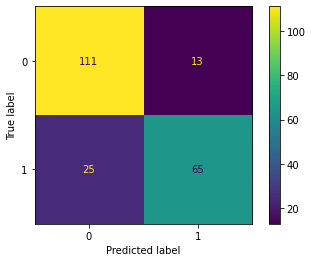

In [118]:
plot_confusion_matrix(Logistic,scaled_X_test,y_test)

In [119]:
Logistic_predicted = Logistic.predict(scaled_X_test)

In [120]:
print(classification_report(y_test,Logistic_predicted))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       124
           1       0.83      0.72      0.77        90

    accuracy                           0.82       214
   macro avg       0.82      0.81      0.81       214
weighted avg       0.82      0.82      0.82       214



## Decision Tree Classifier

In [121]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()

In [122]:
get_score(tree_model,X_train, X_test, y_train, y_test)

0.7990654205607477

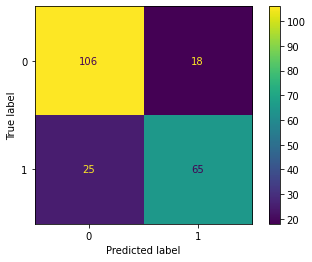

In [123]:
plot_confusion_matrix(tree_model,scaled_X_test,y_test)

In [124]:
Tree_predicted = tree_model.predict(scaled_X_test)

In [125]:
print(classification_report(y_test,Tree_predicted))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       124
           1       0.78      0.72      0.75        90

    accuracy                           0.80       214
   macro avg       0.80      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214



## Random Forest Classifier

In [126]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

In [127]:
get_score(RFC,X_train, X_test, y_train, y_test)

0.8177570093457944

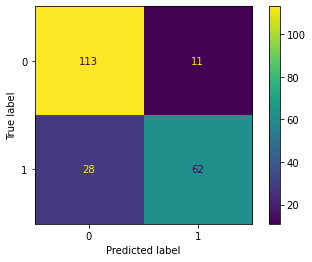

In [128]:
plot_confusion_matrix(RFC,scaled_X_test,y_test)

In [129]:
RFC_predicted = RFC.predict(scaled_X_test)

In [130]:
print(classification_report(y_test,RFC_predicted))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       124
           1       0.85      0.69      0.76        90

    accuracy                           0.82       214
   macro avg       0.83      0.80      0.81       214
weighted avg       0.82      0.82      0.81       214



## Naive Bayes

In [131]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [132]:
get_score(NB,X_train, X_test, y_train, y_test)

0.7850467289719626

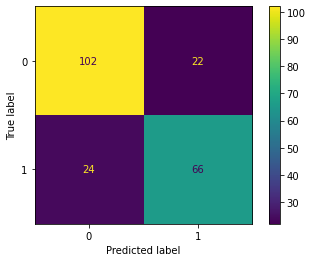

In [133]:
plot_confusion_matrix(NB,scaled_X_test,y_test)

In [134]:
NB_predicted = NB.predict(scaled_X_test)

In [135]:
print(classification_report(y_test,NB_predicted))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       124
           1       0.75      0.73      0.74        90

    accuracy                           0.79       214
   macro avg       0.78      0.78      0.78       214
weighted avg       0.78      0.79      0.78       214

